In [2]:
#importing librabries
import numpy as np 
import pandas as pd 
import seaborn as sns
from textwrap import wrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df=pd.read_csv("netflixData.csv")

In [4]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [5]:
# Showcasing data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [6]:
# finding the missing values 
null=df.isnull().any()
null

Show Id               False
Title                 False
Description           False
Director               True
Genres                False
Cast                   True
Production Country     True
Release Date           True
Rating                 True
Duration               True
Imdb Score             True
Content Type          False
Date Added             True
dtype: bool

In [7]:
null_1=df.isnull().sum()
null_1

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

<AxesSubplot:>

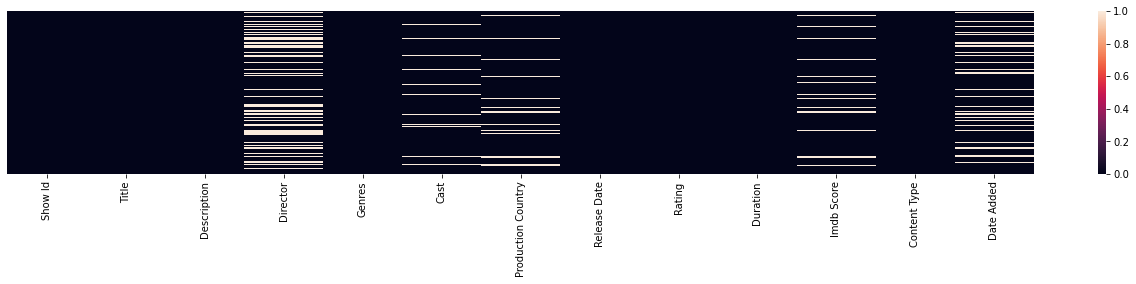

In [8]:
# Trying to visualise the Null Values
plt.figure(figsize=(23, 3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True) #in the graph we can see director,cast,production country,imdb score and date added has null values

In [9]:
# so we need to know the percentage null values in the table.
null_t = null.sort_values(ascending=False)
per = (null / df.isnull().count()).sort_values(ascending=False)
total = pd.concat([null_t, per], axis=1, keys=[
                  'Null Value State', 'Percentages of null values'])
total.T.style.bar()

,Director,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Date Added,Show Id,Title,Description,Genres,Content Type
Null Value State,True,True,True,True,True,True,True,True,False,False,False,False,False
Percentages of null values,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168,0.000168,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
# Converting the Null values.For integer I use mean values and for text I used high frequent values
num_col = df._get_numeric_data().columns.tolist() #identifying the numberic columns 
print(num_col)


['Release Date']


In [11]:
cat_col = set(df.columns) - set(num_col) #identifying the remaining columns
print(cat_col)

{'Title', 'Description', 'Cast', 'Content Type', 'Show Id', 'Director', 'Imdb Score', 'Date Added', 'Duration', 'Production Country', 'Rating', 'Genres'}


In [12]:
for i in cat_col:
    df[i].fillna(df[i].mode()[0], inplace=True)
for i in num_col:
    df[i].fillna(df[i].mean(), inplace=True)

In [13]:
df.isnull().sum()

Show Id               0
Title                 0
Description           0
Director              0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
Date Added            0
dtype: int64

In [14]:
# Exploring various features of the data set and making necessary adjutsments
df['Title']=df['Title'].str.replace('#','') #in the dataset we are able to see # values in front of the title, hear we are trying to replace the values # from the title and making it normal


In [15]:
df['Imdb Score'] = df['Imdb Score'].str.replace('/10', '') # in the imdb score columns we can see '/10' values, which would  create an issue when we try to run our algorithm on the data hence we are converting it to normal numberical values
df['Imdb Score'] = df['Imdb Score'].apply(pd.to_numeric)

In [16]:
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,"Raúl Campos, Jan Suter",Reality TV,Jeff Dunham,United States,2020.0,TV-MA,1 Season,6.6,TV Show,"June 2, 2021"
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,blackAF,Kenya Barris and his family navigate relations...,"Raúl Campos, Jan Suter",TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6,TV Show,"June 2, 2021"
4,7f2d4170-bab8-4d75-adc2-197f7124c070,cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",Jeff Dunham,Canada,2020.0,TV-14,90 min,5.1,Movie,"February 5, 2020"


In [17]:
# intital Visulisation of the data, for this purpose i am using random 500 points from the data
samp=df.sample(n=100)

Text(0, 0.5, 'number of production')

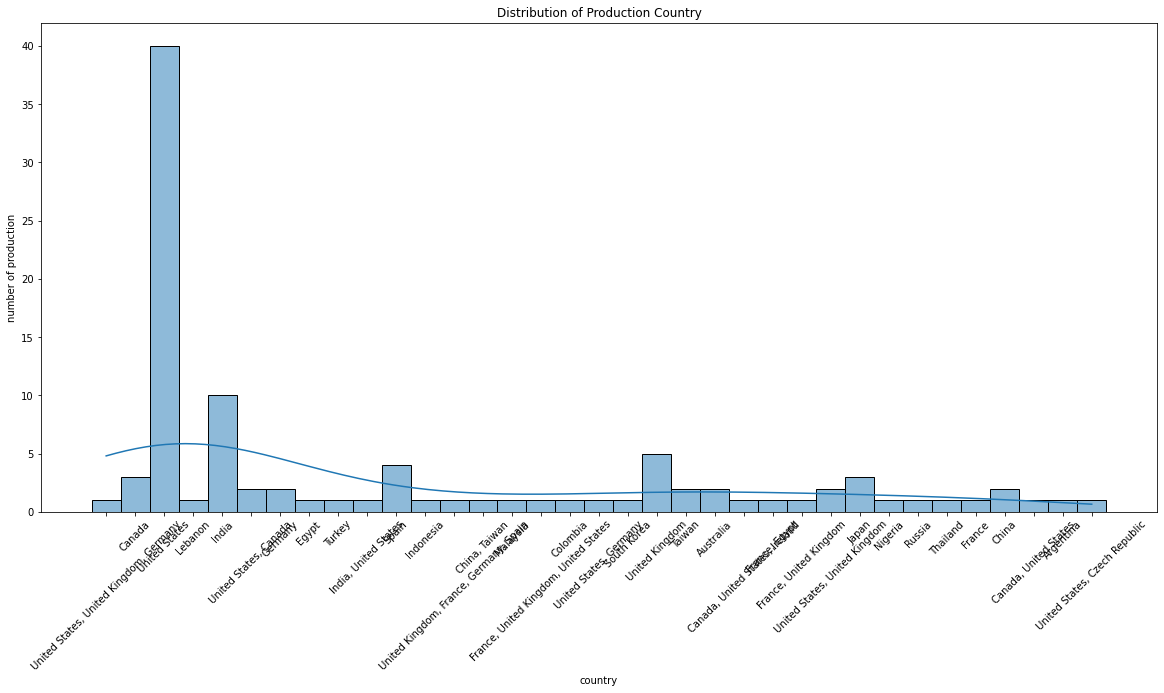

In [18]:
fig = plt.figure(figsize=(20, 9))
ax = plt.axes()
plt.title('Distribution of Production Country')
sns.histplot(samp['Production Country'], kde=True)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.xlabel('country')
plt.ylabel('number of production')

Text(3, 7, 'Skewness coeff. is:-0.7801998787680353')

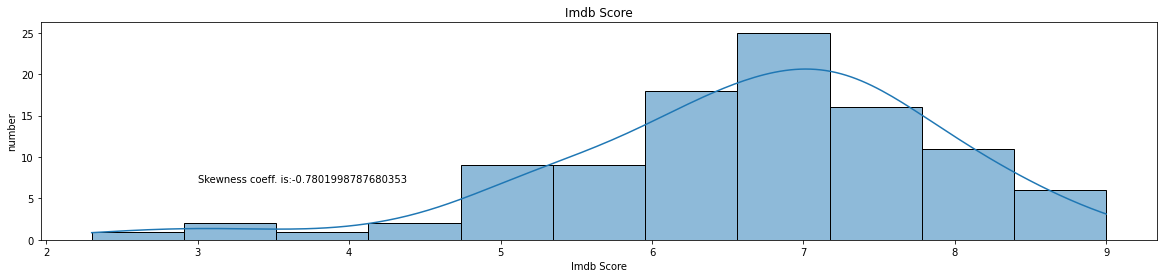

In [19]:
fig = plt.figure(figsize=(20, 4))
ax = plt.axes()
plt.title('Imdb Score')
sns.histplot(samp['Imdb Score'], kde=True)
plt.xlabel('Imdb Score')
plt.ylabel('number')
plt.text(3,7, 'Skewness coeff. is:' + str(df['Imdb Score'].skew()))

In [37]:
# Building a recommender based on the decription, for this we are usinf tid vertor
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['Description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5967, 15466)

In [38]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [40]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [64]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[Title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['Title'].iloc[movie_indices]

In [66]:
get_recommendations('A Mighty Team')

1605                         Feel the Beat
3712                     Playing for Keeps
4923                The Invisible Guardian
2546             Kilometers and Kilometers
1045    Club de Cuervos Presents: I, Potro
4785             The Distinguished Citizen
4553                        Tanu Weds Manu
5469                     Train of the Dead
5405                         Titipo Titipo
1501                 English Babu Desi Mem
Name: Title, dtype: object